In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Energy_efficiency_Data_Set_preprocessed.csv', decimal=",")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
x = data.drop(columns=['Y1','Y2'])
y1 = data['Y1']
y2 = data['Y2']

std = StandardScaler()
x_scaled = std.fit(x).transform(x)

In [4]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x_scaled, y1, test_size=0.20)
X2_train, X2_test, y2_train, y2_test = train_test_split(x_scaled, y2, test_size=0.20)

<AxesSubplot:>

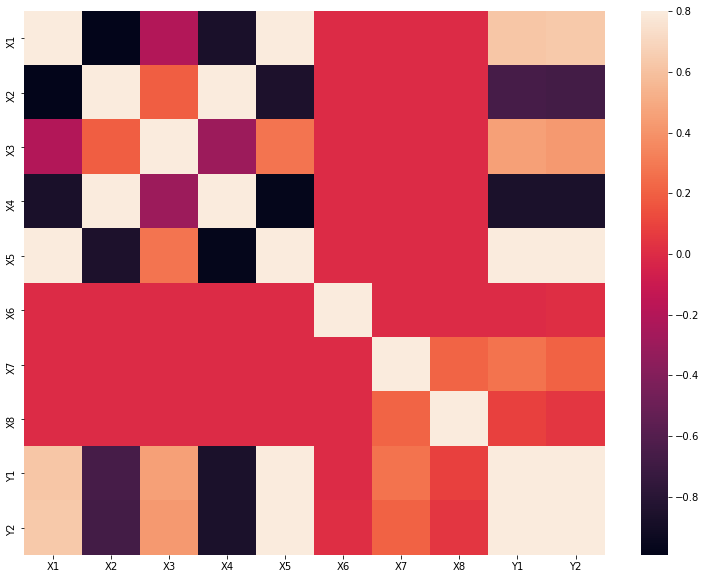

In [6]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), vmax=0.8)

# Линейная регрессия

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [8]:
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

In [9]:
print ('R2:',r2_score(y1_test, y1_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y1_test, y1_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y1_test, y1_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y1_test, y1_pred))

R2: 0.910589675611715
Mean Square Error(MSE): 3.1427030517047974
Root Mean Square Error(RMSE): 1.7727670607569392
mean absolute error (MAE): 2.247711505731131


In [10]:
model = LinearRegression()
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)

In [11]:
print ('R2:',r2_score(y2_test, y2_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y2_test, y2_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y2_test, y2_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y2_test, y2_pred))

R2: 0.8740085399775844
Mean Square Error(MSE): 3.3102072674036878
Root Mean Square Error(RMSE): 1.8193975012084873
mean absolute error (MAE): 2.4291297114694097


# Регрессия дерева решений

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [14]:
y1_pred=model.predict(X1_test)

In [15]:
print ('R2:',r2_score(y1_test, y1_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y1_test, y1_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y1_test, y1_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y1_test, y1_pred))

R2: 0.9960749645575195
Mean Square Error(MSE): 0.6584628893289103
Root Mean Square Error(RMSE): 0.81145726278647
mean absolute error (MAE): 0.4243506493506493


In [16]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [17]:
y2_pred=model.predict(X2_test)

In [18]:
print ('R2:',r2_score(y2_test, y2_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y2_test, y2_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y2_test, y2_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y2_test, y2_pred))

R2: 0.9494721185749164
Mean Square Error(MSE): 2.0962842822975594
Root Mean Square Error(RMSE): 1.4478550626003832
mean absolute error (MAE): 1.1232467532467534


# LASSO

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [20]:
model = Lasso(alpha=1.0)
model.fit(X1_train, y1_train)

Lasso()

In [21]:
y1_pred=model.predict(X1_test)

In [22]:
print ('R2:',r2_score(y1_test, y1_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y1_test, y1_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y1_test, y1_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y1_test, y1_pred))

R2: 0.8592089520641759
Mean Square Error(MSE): 3.9436379092613434
Root Mean Square Error(RMSE): 1.9858594888010943
mean absolute error (MAE): 2.913420059176826


In [23]:
model = Lasso(alpha=1.0)
model.fit(X2_train, y2_train)

Lasso()

In [24]:
y2_pred=model.predict(X2_test)

In [25]:
print ('R2:',r2_score(y2_test, y2_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y2_test, y2_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y2_test, y2_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y2_test, y2_pred))

R2: 0.843034918485591
Mean Square Error(MSE): 3.6947593635325275
Root Mean Square Error(RMSE): 1.9221756848770426
mean absolute error (MAE): 2.806250887365514


# Гребневая регрессия

In [26]:
from sklearn.linear_model import Ridge

In [27]:
model=Ridge(alpha=1.0)
model.fit(X1_train, y1_train)

Ridge()

In [28]:
y1_pred=model.predict(X1_test)

In [29]:
print ('R2:',r2_score(y1_test, y1_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y1_test, y1_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y1_test, y1_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y1_test, y1_pred))

R2: 0.9097855078823786
Mean Square Error(MSE): 3.1568043491896027
Root Mean Square Error(RMSE): 1.7767398090856192
mean absolute error (MAE): 2.2652289723499237


In [30]:
model=Ridge(alpha=1.0)
model.fit(X2_train, y2_train)

Ridge()

In [31]:
y2_pred=model.predict(X2_test)

In [32]:
print ('R2:',r2_score(y2_test, y2_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y2_test, y2_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y2_test, y2_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y2_test, y2_pred))

R2: 0.8735659785672703
Mean Square Error(MSE): 3.3160159379932206
Root Mean Square Error(RMSE): 1.8209931186012813
mean absolute error (MAE): 2.4357190932462838


# Elastic Net регрессия

In [33]:
from sklearn.linear_model import ElasticNetCV

In [34]:
model = ElasticNetCV(cv=5, random_state=0)
model.fit(X1_train, y1_train)

ElasticNetCV(cv=5, random_state=0)

In [35]:
y1_pred=model.predict(X1_test)

In [36]:
print ('R2:',r2_score(y1_test, y1_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y1_test, y1_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y1_test, y1_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y1_test, y1_pred))

R2: 0.9059472554748158
Mean Square Error(MSE): 3.2232593307016058
Root Mean Square Error(RMSE): 1.795343791785185
mean absolute error (MAE): 2.316997205317389


In [37]:
model = ElasticNetCV(cv=5, random_state=0)
model.fit(X2_train, y2_train)

ElasticNetCV(cv=5, random_state=0)

In [38]:
y2_pred=model.predict(X2_test)

In [39]:
print ('R2:',r2_score(y2_test, y2_pred))
print ('Mean Square Error(MSE):',mean_squared_error(y2_test, y2_pred, squared=False))
print ('Root Mean Square Error(RMSE):',sqrt(mean_squared_error(y2_test, y2_pred, squared=False)))
print ('mean absolute error (MAE):',mean_absolute_error(y2_test, y2_pred))

R2: 0.8713549591433126
Mean Square Error(MSE): 3.3448847469514735
Root Mean Square Error(RMSE): 1.8289026072898122
mean absolute error (MAE): 2.4768556110197104


# Ссылки



https://mcs.mail.ru/blog/-5-algoritmov-regressii-v-mashinnom-obuchenii \ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html \ https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html \ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html \ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html \ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html
